In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(101)

In [2]:
data = pd.read_csv('C:/Users/Han/Desktop/Final.csv')

In [3]:
hans = pd.DataFrame([])

# Q43 귀하는 보행환경이 만족스러우신가요?

In [4]:
hans['Q43']=data['Q43A1'] + data['Q43A2']

In [5]:
hans.loc[(data['Q43A1'] + data['Q43A2'] <= 5) ,'Q43'] = 1 # 불만족 1
hans.loc[(data['Q43A1'] + data['Q43A2'] > 5) & (data['Q43A1'] + data['Q43A2']  < 8 ) ,'Q43'] = 0 #보통 =0
hans.loc[(data['Q43A1'] + data['Q43A2'] >=8 ) ,'Q43'] = 2  # 만족 2

# Q44 귀하는 현재 자전거를 이용하시나요?

In [6]:
hans['Q44']=data['Q44'] # 3 은 미이용

In [7]:
hans['Q44A'] = data['Q44A']
# 자전거를 이용하지 않으면 Q44A 에서 nan 으로 나타날 것이다.
hans.loc[(data['Q44'] == 3) , 'Q44A'] = 0 #미이용
hans.loc[(data['Q44A'] == 1) | (data['Q44A'] == 2) ,'Q44A'] = 1 # 불만족 1
hans.loc[(data['Q44A'] == 3) ,'Q44A'] = 2  # 보통 2
hans.loc[(data['Q44A'] == 4) | (data['Q44A'] == 5) ,'Q44A'] = 3 #만족 3


# Q45 서울의 교통수단에 대한 만족도

이때 뒤에 버스의 만족도 부분은 문항이 겹친다. 그래프 그려본 결과 둘이 어느정도 상관관계가 있었다. 
즉 대중교통에 대한 만족 / 택시에 대한 만족으로 나누도록 하자.

In [8]:
hans.loc[(data['Q45A1'] == 9) ,'Q45A1'] = 0 # 이용안함
hans.loc[(data['Q45A1'] == 1) | (data['Q45A1'] == 2) ,'Q45A1'] = 1 # 불만족 1
hans.loc[(data['Q45A1'] == 3) ,'Q45A1'] = 2  # 보통 2
hans.loc[(data['Q45A1'] == 4) | (data['Q45A1'] == 5) ,'Q45A1'] = 3 #만족 3

hans.loc[(data['Q45A3'] == 9) ,'Q45A3'] = 0 # 이용안함
hans.loc[(data['Q45A3'] == 1) | (data['Q45A3'] == 2) ,'Q45A3'] = 1 # 불만족 1
hans.loc[(data['Q45A3'] == 3) ,'Q45A3'] = 2  # 보통 2
hans.loc[(data['Q45A3'] == 4) | (data['Q45A3'] == 5) ,'Q45A3'] =3

# Q47 직업관련 질문

In [9]:
data['Q47A'].value_counts()

3.0    5355
2.0    1481
4.0    1119
1.0     453
5.0     154
Name: Q47A, dtype: int64

In [10]:
np.random.randint(0,4)

3

In [11]:
hans['Q47'] = data['Q47']
hans.loc[(data['Q47']) ==2 , 'Q47' ] = 0 # 무직 =0
hans.loc[(data['Q47A'] == 1) | (data['Q47A'] == 2) ,'Q47'] = 1 # 고용주/ 단독자영업 
hans.loc[(data['Q47A'] == 3) ,'Q47'] = 2  # 상용근로자 2
hans.loc[(data['Q47A'] == 4) | (data['Q47A'] == 5),'Q47'] = 3 # 무급/입시직
hans.loc[(data['Q47A'] == 6),'Q47'] = np.random.randint(0,4) # 기타는 랜덤으로 대체

# Q47_B 귀하의 근무형태?

In [12]:
hans['Q47B'] = data['Q47B'].fillna(0) #0=무직 

# Q47_C직업이 만족스러우신가요?

In [13]:
hans['Q47C'] = data['Q47C'].fillna(0).astype('int') #무직은 0...

In [14]:
hans.loc[(data['Q47C'] == 1) | (data['Q47C'] == 2) ,'Q47C'] = 1 # 불만
hans.loc[(data['Q47C'] == 3) ,'Q47C'] = 2  # 보통
hans.loc[(data['Q47C'] >= 4) ,'Q47C'] = 3 # 긍정

# Q48 은퇴시기는 언제로?

In [15]:
hans.loc[(data['Q48'] <= 3) ,'Q48'] = 0  # 좀 젊을때
hans.loc[(data['Q48'] == 4) ,'Q48'] = 1  # 보통이지 뭐
hans.loc[(data['Q48'] >= 5) ,'Q48'] = 2  # 나이들었을떄

# 49 은퇴후의 월 소득!

In [16]:
#123/4/567
hans.loc[(data['Q49'] <= 3) ,'Q49'] = 0 
hans.loc[(data['Q49'] == 4) ,'Q49'] = 1  
hans.loc[(data['Q49'] >= 5) ,'Q49'] = 2 

In [17]:
hans = hans.astype('int')

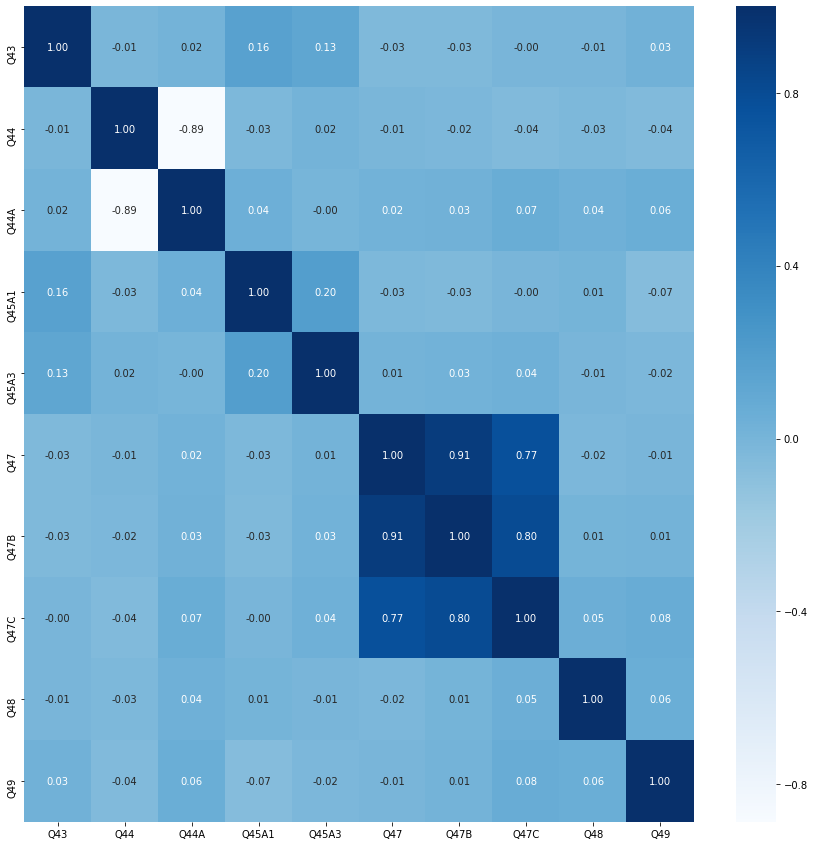

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data = hans.corr(), annot=True, fmt = '.2f', cmap='Blues');

In [19]:
list(hans.columns.values)

['Q43', 'Q44', 'Q44A', 'Q45A1', 'Q45A3', 'Q47', 'Q47B', 'Q47C', 'Q48', 'Q49']

In [20]:
hans=pd.get_dummies(data=hans,columns=list(hans.columns.values),drop_first=True)

In [21]:
hans.to_csv('C:/Users/Han/Desktop/pg3-2.csv')